In [14]:
from run_simulation import run_simulation

sample_keys = ["H0:D10", "H1:D9", "H2:D8", "H3:D7", "H4:D6", "H5:D5"]
T_Celsius = 800
T_Kelvin = T_Celsius + 273.15
print(f"simulate in {T_Kelvin} K")

Ion_D_list = []
Ion_HD_list = []
c_H_final_list = []
c_D_final_list = []
time_array_list = []
space_array_list = []
H2_pressures = []
J_D_list = []

for sample_key in sample_keys:
    Ion_D, Ion_HD, c_H_final, c_D_final, time_array, space_array, J_D, H2_pressure = run_simulation(P_D2=1e5, temperature=T_Kelvin, sample_key=sample_key)
    
    Ion_D_list.append(Ion_D)
    Ion_HD_list.append(Ion_HD)
    c_H_final_list.append(c_H_final)
    c_D_final_list.append(c_D_final)
    time_array_list.append(time_array)
    space_array_list.append(space_array)
    H2_pressures.append(H2_pressure)
    
    J_D_list.append(J_D)




simulate in 1073.15 K
材料是W, k_r选用Mingzhong Zhao/I. Takagi的结果。
节点数N=285，满足要求，无需调整Delta_t。
Simulation parameters initialized:
dimensionless permeation number is 337.4690
  H₂ Pressure: 0.0 Pa
  D₂ Pressure: 100000.0 Pa
  HD Pressure: 0.000 Pa
  Temperature: 1073.15 K
  Gas phase equilibrium: False
  Material thickness L: 0.000301 m
  Total simulation time: 2000 s
  Initial time step Delta_t: 1.0000e-02 s
  Spatial step Delta_l: 1.0552e-06 m
  Number of nodes N: 285

Calculated parameters at 1073.15 K:
  D isotope parameters:
    D = 1.1135e-10 m²/s
    K_S = 6.7062e-03 mol/(m^3·pa^(0.5))
    kr_atom = 9.775459e-29 molec·m⁴/(s·at²)
    k_d = 2.6476e-09 mol/(m²·s·Pa)
    k_r = 5.8869e-05 m⁴/(s·mol)
  H isotope parameters:
    D_iso = 1.5748e-10 m²/s
    k_d_iso = 3.7442e-09 mol/(m²·s·Pa)
    k_r_iso = 8.3254e-05 m⁴/(s·mol)

  Heteronuclear molecule ij (HD) parameters:
    k_d_ij = 3.0571e-09 mol/(m²·s·Pa)
    k_r_ij = 6.7976e-05 m⁴/(s·mol)
节点数不满足条件，已调整为 N = 284
节点数不满足条件，已调整为 N = 283
节点数不满足

### write data

In [ ]:
def write_data_to_file(file_path, temperature, Ion_D_list, J_D_list, first_time=False):
    """
    Function to write simulation results to a file.

    Parameters:
    - file_path: Path to the output file.
    - temperature: The temperature value for the simulation.
    - JD2: The D2 permeation flux (or the desired parameter).
    - JD: The D permeation flux (or the desired parameter).
    - first_time: Flag indicating whether this is the first write (to add header).
    """
    # Open the file in append mode
    sup_rate_Ion_D2 = (Ion_D_list[0][-1]-Ion_D_list[-1][-1])/Ion_D_list[0][-1]
    sup_rate_J_D = (J_D_list[0][-1]-J_D_list[-1][-1])/J_D_list[0][-1]
    print(f"I_D2 for H2:D2. 0:10 ：{Ion_D_list[0][-1]:.2e}, 1:1 : {Ion_D_list[-1][-1]} \n")
    print(f"J_D for H2:D2. 0:10 ：{J_D_list[0][-1]:.2e}, 1:1 : {J_D_list[-1][-1]:.2e}")

    with open(file_path, 'a') as file:
        if first_time:
            # Write the header line only once
            file.write(f"# temperature Ion_D2_suppression J_D_suppression\n")

        # Write the data (temperature, JD2, JD)
        file.write(f"{temperature:.4f} {sup_rate_Ion_D2:.4f} {sup_rate_J_D:.4f}\n")

file_path = "permeation_suppressed_data.txt"
write_data_to_file(file_path, T_Kelvin, Ion_D_list, J_D_list, first_time=False)

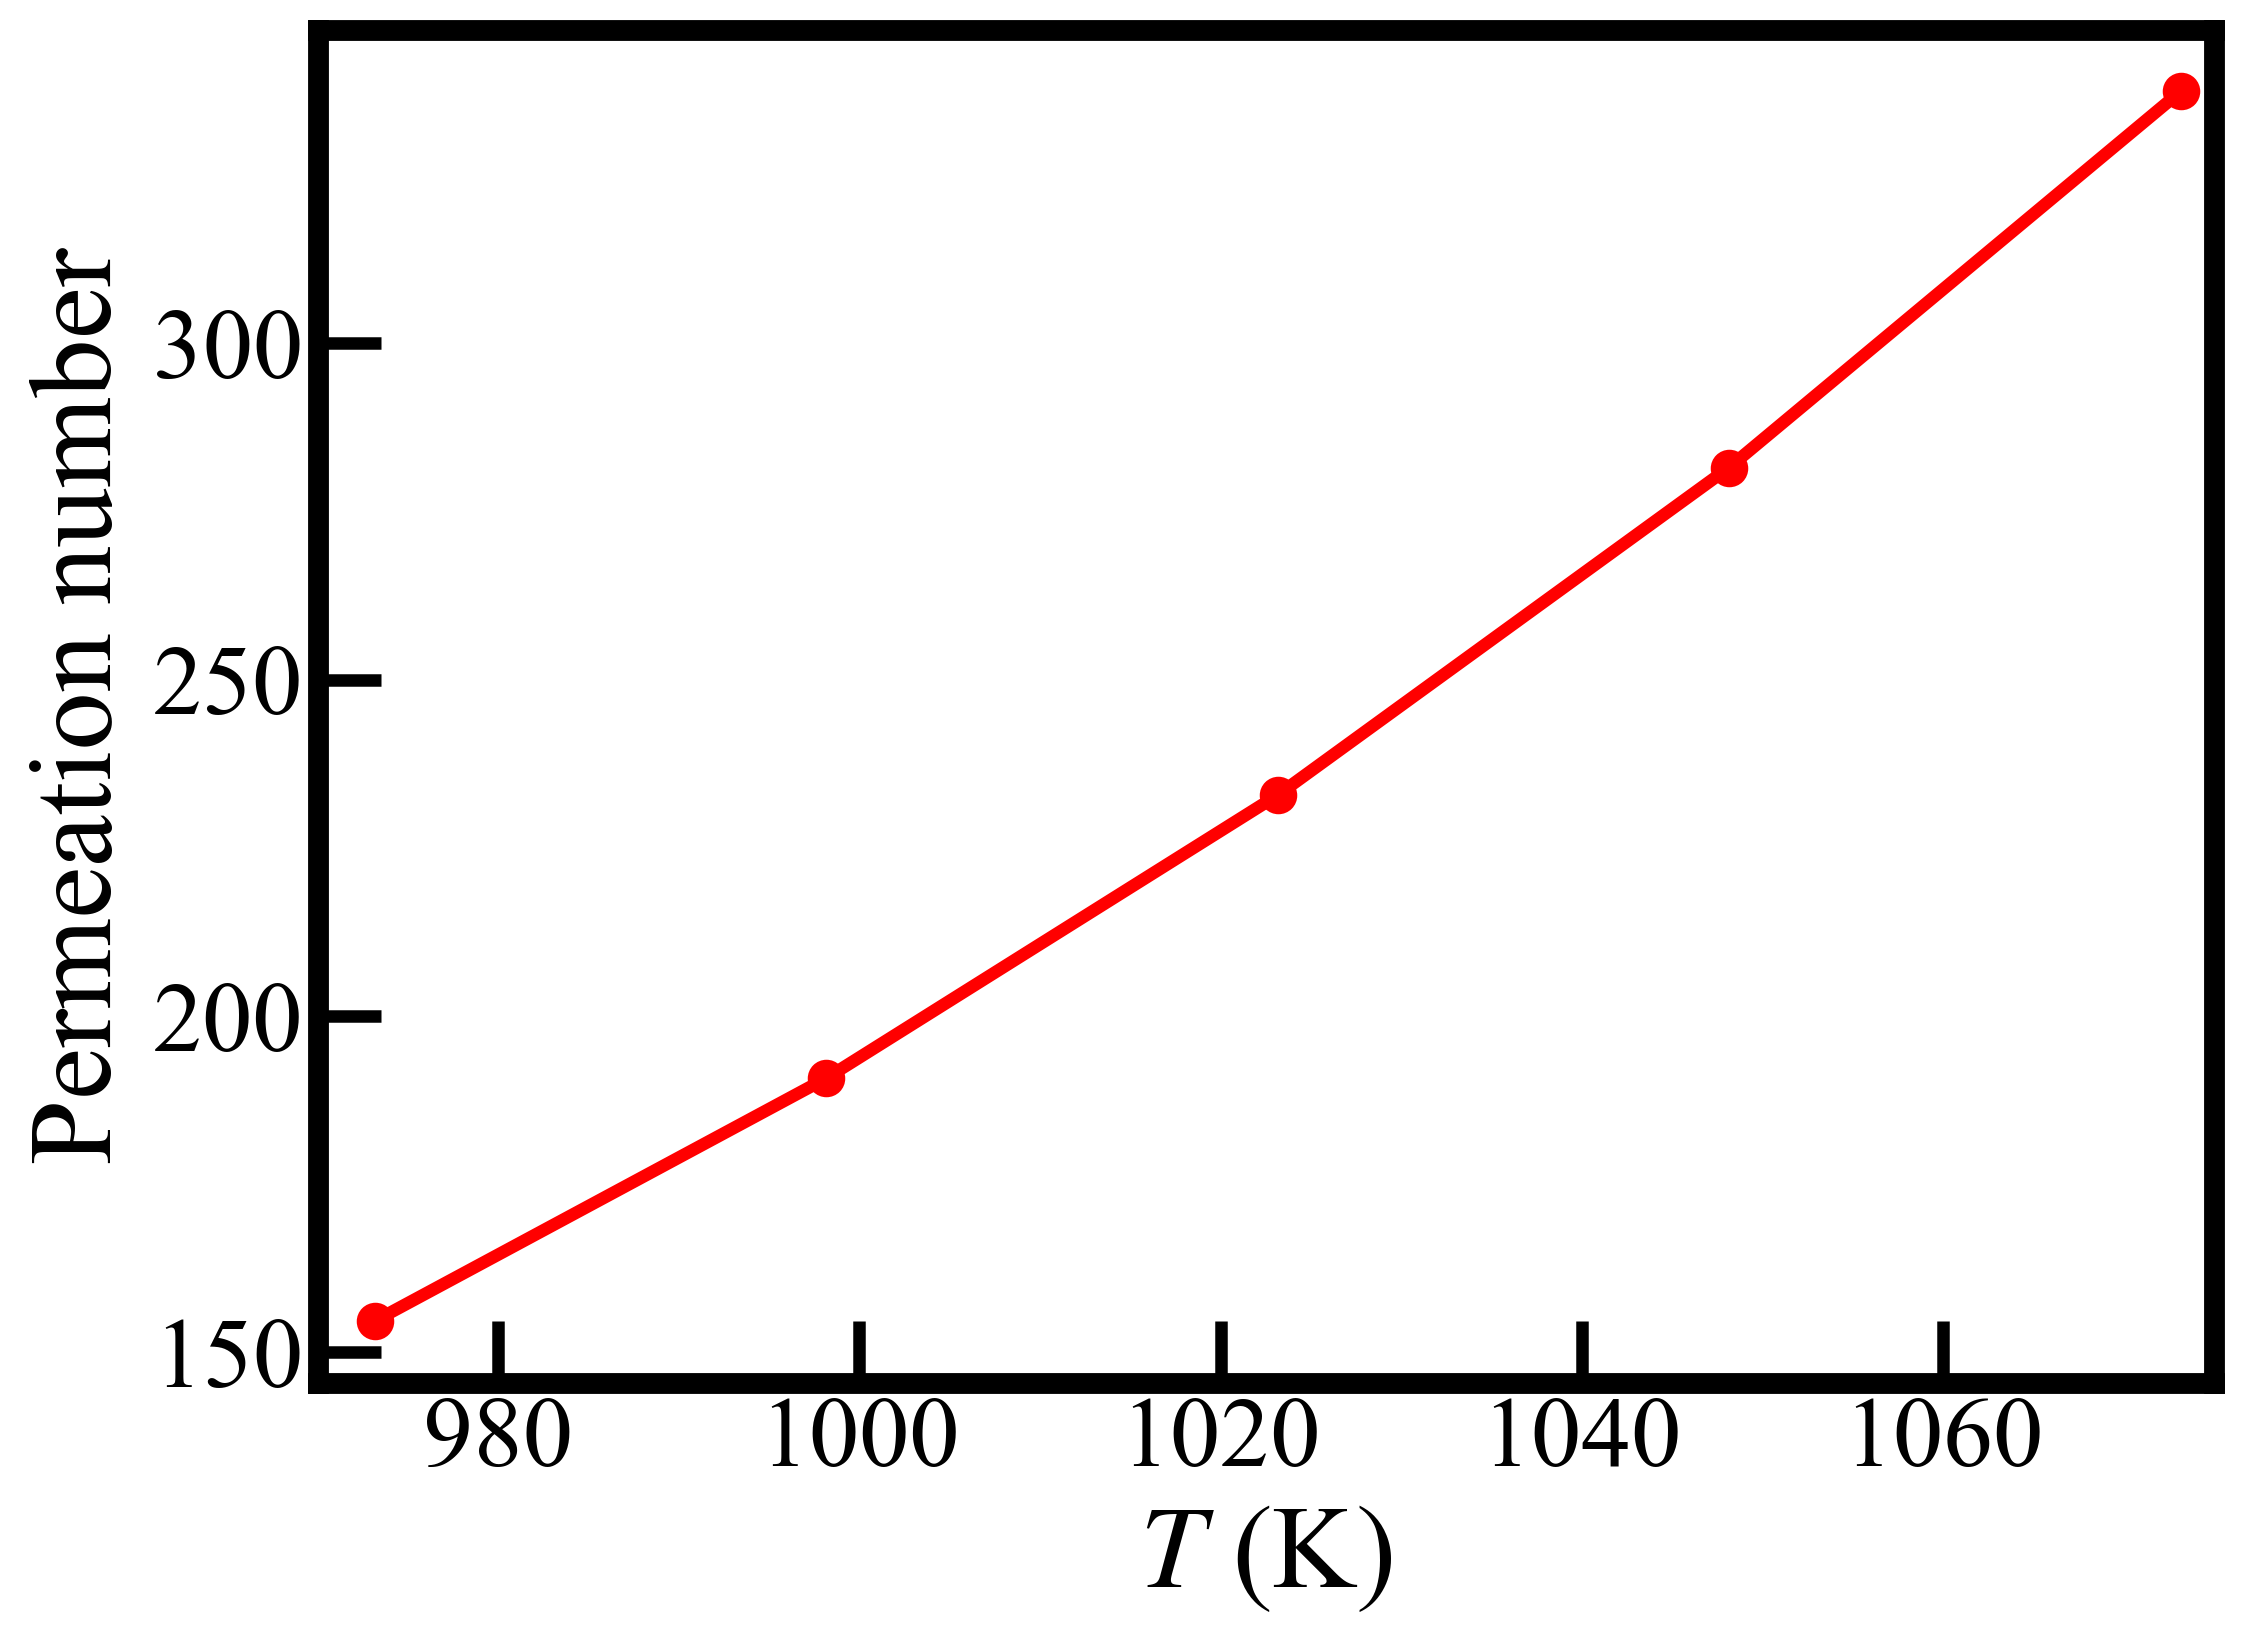

In [1]:
import numpy as np
def read_energy_data(filename):
    """
    从给定文件读取温度、能量和标准差数据（从第二行开始），
    返回 T, E, sigma 三个 numpy 数组。
    
    文件格式：
    第一行为注释（忽略）
    从第二行开始每行为：T E sigma（以空格分隔）
    """
    T_list = []
    J_D2_suppression_list = []
    J_D_suppression_list = []
    W_list = []
    
    with open(filename, "r") as f:
        lines = f.readlines()[1:]  # 跳过第一行注释
        for line in lines:
            parts = line.strip().split()
            if len(parts) >= 3:
                T, J_D2_suppression, J_D_suppression, W = map(float, parts[:4])
                T_list.append(T)
                J_D2_suppression_list.append(J_D2_suppression)
                J_D_suppression_list.append(J_D_suppression)
                W_list.append(W)
    
    return np.array(T_list), np.array(J_D2_suppression_list), np.array(J_D_suppression_list), np.array(W_list)

T_list, J_D2_suppression_list, J_D_suppression_list, W_list = read_Aenergy_data("permeation_suppressed_data.txt")

import matplotlib.pyplot as plt
from matplotlib import rcParams
# Configuration for plot aesthetics
config = {
    "font.family": 'serif',
    "mathtext.fontset": 'stix',
    "font.serif": ['Times New Roman'],
    "font.size": 24,
}
rcParams.update(config)

def plot(T_list, J_D2_suppression_list, J_D_suppression_list):
    """
    Function to plot free energy difference with 95% confidence intervals
    """
    _, ax0 = plt.subplots(figsize=(8, 6), dpi=300)
    
    #ax0.plot(T_list, J_D2_suppression_list, "-o", markersize=8, linewidth=3, color="red", label=r"Inhibition of $J_{D_2}$")
    #ax0.plot(T_list, J_D_suppression_list, "-o", markersize=8, linewidth=3, color="green", label=r"Inhibition of $J_D$")
    ax0.plot(T_list, W_list, "-o", markersize=8, linewidth=3, color="red")

    #plt.plot(data1b_t, data1b_E,  "x-", linewidth=3.0, markersize=8, color="purple", label="8 H2O unopt")
    #plt.plot(data2b_t, data2b_E,  "+-", linewidth=3.0, markersize=8, color="blue", label="16 H2O unopt")

    # Customize plot spines and tick parameters for ax0
    ax0.spines['bottom'].set_linewidth(5)
    ax0.spines['left'].set_linewidth(5)
    ax0.spines['right'].set_linewidth(5)
    ax0.spines['top'].set_linewidth(5)

    ax0.tick_params(top=False, bottom=True, left=True, right=False, direction='in')
    ax0.tick_params(length=15, width=3, which='major', direction='in')
    plt.xlim([970, 1075])
    # Set labels, title, and legend for ax0
    ax0.set_xlabel("$T$ (K)", fontsize=28)
    ax0.set_ylabel("Permeation number", fontsize=28)
    #ax0.legend(fontsize=18, loc="lower right")
    ax0.grid(False)

    # Tight layout
    plt.tight_layout()
    plt.savefig(f"Permeation_number.pdf", format="pdf", bbox_inches="tight")
    plt.show()


# Plot results
plot(T_list, J_D2_suppression_list, J_D_suppression_list)


### plot permeation

In [76]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.colors as mcolors

# Configuration for plot aesthetics
config = {
    "font.family": 'serif',
    "mathtext.fontset": 'stix',
    "font.serif": ['Times New Roman'],
    "font.size": 24,
}
rcParams.update(config)

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker
def sci_format(x, pos):
    return f"{x:.0e}"  # 例如：1.0e5

def plot(Ion_D_list, Ion_HD_list, c_D_final_list, c_H_final_list, time_array_list, space_array_list, H2_pressures, temperature, figsize=12):
    """
    Function to plot multiple simulation results, with each set of results labeled by H2 pressure.

    Parameters:
    - Ion_D_list: A list of Ion_D arrays from multiple simulations.
    - Ion_HD_list: A list of Ion_HD arrays from multiple simulations.
    - c_D_final_list: A list of c_D_final arrays from multiple simulations.
    - c_H_final_list: A list of c_H_final arrays from multiple simulations.
    - time_array_list: A list of time arrays from multiple simulations.
    - space_array_list: A list of space arrays from multiple simulations.
    - H2_pressures: A list of H2 pressures, used for labeling each curve.
    """
    fig, axes = plt.subplots(4, 1, figsize=(5, 20))  # 设置适当的大小（减少尺寸，避免图形过大）
    
    # Normalize the color scale based on H2_pressures
    norm = mcolors.Normalize(vmin=min(H2_pressures), vmax=max(H2_pressures))
    sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)  # viridis is a good perceptually uniform colormap
    sm.set_array([])  # Necessary to make colorbar work
    
    # Loop through all simulations and plot the results
    for i, (Ion_D, Ion_HD, c_D_final, c_H_final, time_array, space_array) in enumerate(zip(Ion_D_list, Ion_HD_list, c_D_final_list, c_H_final_list, time_array_list, space_array_list)):
        color = sm.to_rgba(H2_pressures[i])  # Get color from colormap based on H2_pressure
        H2_label = f"$P_H$ = {H2_pressures[i] // 1000} KPa"  # Format H2 pressure in scientific notation

        # Plot the time vs Ion signals for D2 (ax1)
        axes[0].plot(time_array, Ion_D, "-", linewidth=3.0, color=color)
        
        # Plot the time vs Ion signals for HD (ax2) with dashed line
        axes[1].plot(time_array, Ion_HD, "--", linewidth=3.0, color=color)
        
        # Plot the depth vs D concentration (ax3)
        axes[2].plot(space_array, c_D_final, "-", linewidth=3.0, color=color)
        
        # Plot the depth vs H concentration (ax4)
        axes[3].plot(space_array, c_H_final, "--", linewidth=3.0, color=color)

    # Customize plot spines and tick parameters for all axes
    for ax in axes:
        ax.spines['bottom'].set_linewidth(5)
        ax.spines['left'].set_linewidth(5)
        ax.spines['right'].set_linewidth(5)
        ax.spines['top'].set_linewidth(5)
        ax.tick_params(top=False, bottom=True, left=True, right=False, direction='in')
        ax.tick_params(length=15, width=3, which='major', direction='in')
        ax.xaxis.set_major_formatter(mticker.FuncFormatter(sci_format))

    # Set labels, title, and legend for each axis
    axes[0].set_xlabel("Time (s)", fontsize=28)
    #axes[0].set_ylabel(r"$I_{D_2}$ (A)", fontsize=28)
    axes[0].grid(False)
    axes[0].set_title(f"{temperature} K", fontsize=30, color='#8B3A3A')  # Title only for the first subplot

    axes[1].set_xlabel("Time (s)", fontsize=28)
    #axes[1].set_ylabel(r"$I_{HD}$ (A)", fontsize=28)
    axes[1].grid(False)

    axes[2].set_xlabel("Depth (m)", fontsize=28)
    #axes[2].set_ylabel(f"$c_D$ (mol/$m^3$)", fontsize=28)
    axes[2].grid(False)

    axes[3].set_xlabel("Depth (m)", fontsize=28)
    #axes[3].set_ylabel(f"$c_H$ (mol/$m^3$)", fontsize=28)
    axes[3].grid(False)

    # Adjust subplots and make room for colorbar
    plt.subplots_adjust(hspace=0.4)  # Adjust vertical space between subplots

    # Add a colorbar to the right of the plot and move it further right
    cbar = fig.colorbar(sm, ax=axes, orientation='vertical', label=r"$P_{H_2}$ (Pa)", 
                        fraction=0.10,  # 颜色条宽度占主图宽度的5%
                        aspect=40,pad=0.08)  # Adjust colorbar position

    # 设置科学计数法格式
    cbar.formatter = mticker.ScalarFormatter(useMathText=True)
    cbar.formatter.set_powerlimits((0, 0))  # 强制使用科学计数法
    cbar.update_normal(sm)

    # 设置 ticks 朝内
    cbar.ax.tick_params(length=0, width=0, which='major', direction='in')

    # Tight layout
    #plt.tight_layout()
    plt.savefig(f"Ion_flux_{temperature}.pdf", format="pdf", bbox_inches="tight")
    plt.show()


def plot_JD(time_array_list, J_D_list, H2_pressures, temperature):
    """
    Function to plot 
    """
    fig, ax1 = plt.subplots(figsize=(5, 4)) 
    # Define colors for each simulation result
    # Normalize the color scale based on H2_pressures
    norm = mcolors.Normalize(vmin=min(H2_pressures), vmax=max(H2_pressures))
    sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)  # viridis is a good perceptually uniform colormap
    sm.set_array([])  # Necessary to make colorbar work
    
    # Loop through all simulations and plot the results
    for i, (time_array, J_D) in enumerate(zip(time_array_list, J_D_list)):
        color = sm.to_rgba(H2_pressures[i])  # Get color from colormap based on H2_pressure
        H2_label = f"$P_H$ = {H2_pressures[i]//1000} Pa"  # Format H2 pressure in scientific notation
        
        ax1.plot(time_array, J_D, "-", linewidth=3.0, color=color)

    # Customize plot spines and tick parameters for ax0
    ax1.spines['bottom'].set_linewidth(5)
    ax1.spines['left'].set_linewidth(5)
    ax1.spines['right'].set_linewidth(5)
    ax1.spines['top'].set_linewidth(5)

    ax1.tick_params(top=False, bottom=True, left=True, right=False, direction='in')
    ax1.tick_params(length=15, width=3, which='major', direction='in')

    # Set labels, title, and legend for ax0
    ax1.set_xlabel("Time (s)", fontsize=28)
    #ax1.set_ylabel(r"$J_D$ (mol/$m^2$/s)", fontsize=28)
    #ax1.legend(fontsize=18)
    ax1.grid(False)
    ax1.set_title(f"{temperature} K", fontsize=30, color='#8B3A3A')

    # Add a colorbar to the right of the plot and move it further right
    cbar = fig.colorbar(sm, ax=ax1, orientation='vertical', label=r"$P_{H_2}$ (Pa)", shrink=1, aspect=8)  # Adjust colorbar position

    # 设置科学计数法格式
    cbar.formatter = mticker.ScalarFormatter(useMathText=True)
    cbar.formatter.set_powerlimits((0, 0))  # 强制使用科学计数法
    cbar.update_normal(sm)

    # 设置 ticks 朝内
    cbar.ax.tick_params(length=0, width=0, which='major', direction='in')

    # Tight layout
    #plt.tight_layout()
    plt.savefig(f"J_D_{temperature}.pdf", format="pdf", bbox_inches="tight")
    plt.show()

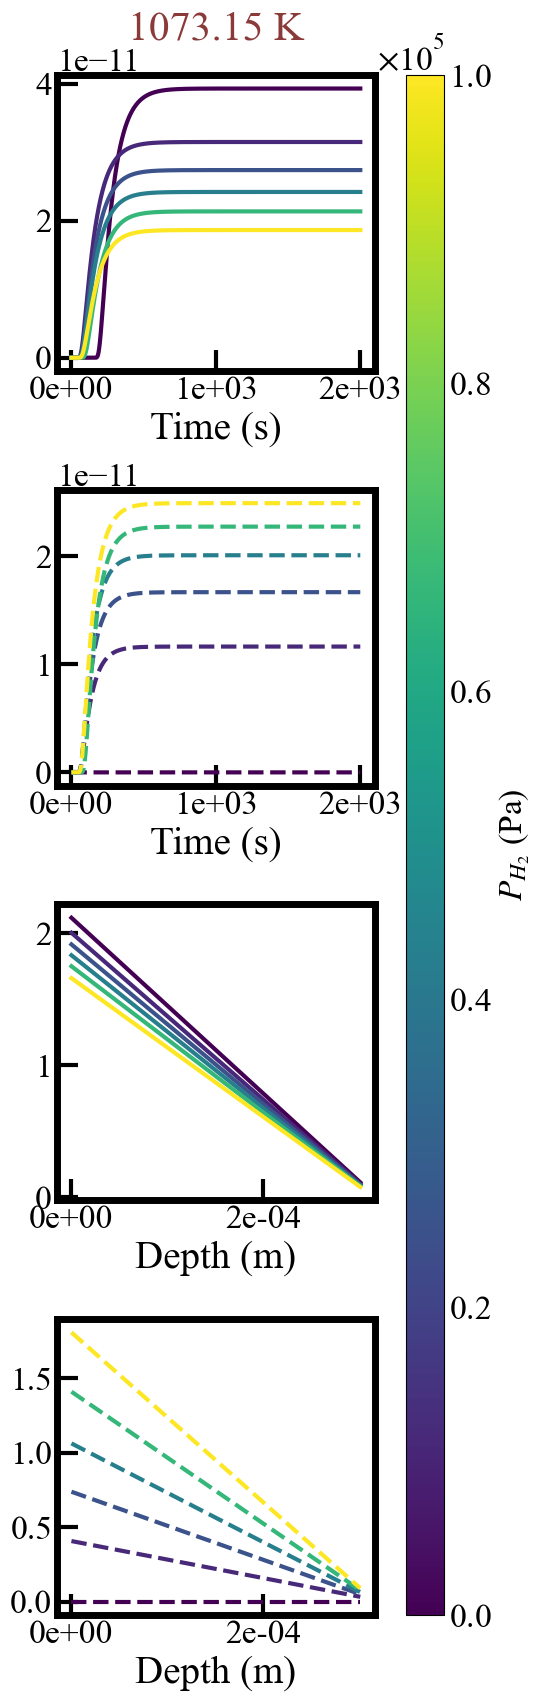

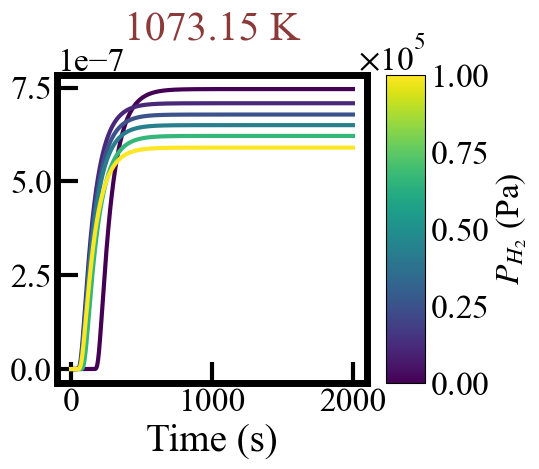

In [77]:
plot(Ion_D_list, Ion_HD_list, c_D_final_list, c_H_final_list, time_array_list, space_array_list, H2_pressures, T_Kelvin, figsize=7)

plot_JD(time_array_list, J_D_list, H2_pressures, T_Kelvin)

